# Importing libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from keras.models import load_model
from matplotlib import pyplot


# Importing datasets

In [2]:

# Path to local data directory
data_dir = '/Users/air/Desktop/FinalProject/Data'

# Load data

X_labeled = np.load(f'{data_dir}/X_labeled.npy')
y_labeled = np.load(f'{data_dir}/y_labeled.npy')

X_val = np.load(f'{data_dir}/X_val.npy')
y_val = np.load(f'{data_dir}/y_val.npy')


# Importing Model

In [3]:
from tensorflow.keras.models import load_model

model_path = "/Users/air/Desktop/FinalProject/Models/model.h5"  # specify your path here
model = load_model(model_path)



In [4]:
# Checking the changes in Model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         2

## Modifying Model 

In [5]:
# Removing the top layer and addding a new top layer
model.pop()
model.add(keras.layers.Dense(10, name='dense_3', activation='softmax'))

In [6]:
# Checking the changes in Model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         2

In [7]:
# See layer.trainbale boolean of each layer
for layer in model.layers:
    print(layer.name, layer.trainable)

conv2d True
max_pooling2d True
conv2d_1 True
conv2d_2 True
max_pooling2d_1 True
conv2d_3 True
conv2d_4 True
max_pooling2d_2 True
flatten True
dense True
dropout True
dense_1 True
dropout_1 True
dense_3 True


In [8]:
# Freezing the Convolutional Layers while keeping Dense layers as Trainable
for layer in model.layers:
    if layer.name in ['dense_3', 'dense_1', 'dense', 'dropout', 'dropout_1']:
      layer.trainable=True
    else:
      layer.trainable=False

In [9]:
# See layer.trainbale boolean of each layer
for layer in model.layers:
    print(layer.name, layer.trainable)

conv2d False
max_pooling2d False
conv2d_1 False
conv2d_2 False
max_pooling2d_1 False
conv2d_3 False
conv2d_4 False
max_pooling2d_2 False
flatten False
dense True
dropout True
dense_1 True
dropout_1 True
dense_3 True


# Training

In [10]:

# Compiling the model with optimizer, "sgd" or "Adam"
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


# Training the model on Downstream Task
history=model.fit(X_labeled, y_labeled, validation_data=(X_val, y_val), epochs=33)

Epoch 1/33


2023-08-03 23:46:30.638863: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 12s 38ms/step - loss: 2.3006 - accuracy: 0.1301 - val_loss: 2.1805 - val_accuracy: 0.2240
Epoch 2/33
313/313 [==============================] - 12s 39ms/step - loss: 2.1749 - accuracy: 0.1866 - val_loss: 2.0373 - val_accuracy: 0.2862
Epoch 3/33
313/313 [==============================] - 12s 40ms/step - loss: 2.0630 - accuracy: 0.2236 - val_loss: 1.8972 - val_accuracy: 0.3530
Epoch 4/33
313/313 [==============================] - 13s 41ms/step - loss: 1.9638 - accuracy: 0.2634 - val_loss: 1.7839 - val_accuracy: 0.3970
Epoch 5/33
313/313 [==============================] - 13s 41ms/step - loss: 1.8761 - accuracy: 0.2968 - val_loss: 1.6971 - val_accuracy: 0.4210
Epoch 6/33
313/313 [==============================] - 13s 42ms/step - loss: 1.8058 - accuracy: 0.3251 - val_loss: 1.6282 - val_accuracy: 0.4426
Epoch 7/33
313/313 [==============================] - 13s 41ms/step - loss: 1.7457 - accuracy: 0.3457 - val_loss: 1.5806 - val_accuracy: 0.4522
Epo

## Save Model

In [11]:
# Save the model
model.save('/Users/air/Desktop/FinalProject/Models/Target33epochs-SGD-Final.h5')


# Metrics

157/157 [==============================] - 5s 32ms/step - loss: 1.1439 - accuracy: 0.5990

Test loss, Test accuracy: [1.1439317464828491, 0.5989999771118164]


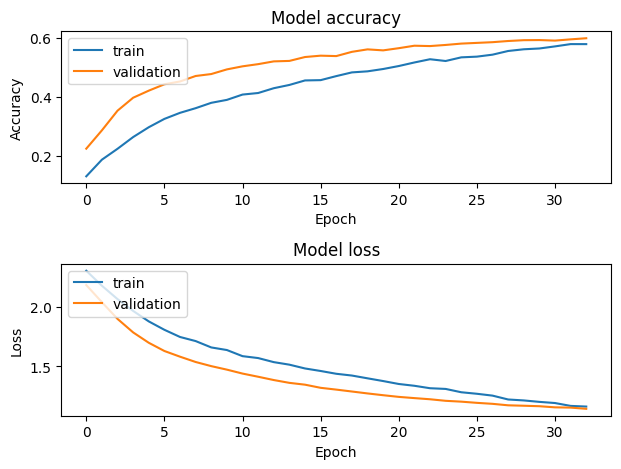

In [13]:
import matplotlib.pyplot as plt

# Training and evaluation

eval_result = model.evaluate(X_val, y_val)
print("\nTest loss, Test accuracy:", eval_result)

# Visualizing the metrics
fig, axs = plt.subplots(2)

# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validation'], loc='upper left')

# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validation'], loc='upper left')

# Plotting Metrics
plt.tight_layout()
plt.show()


## Confusion Matrix

157/157 [==============================] - 5s 31ms/step
Accuracy: 0.599



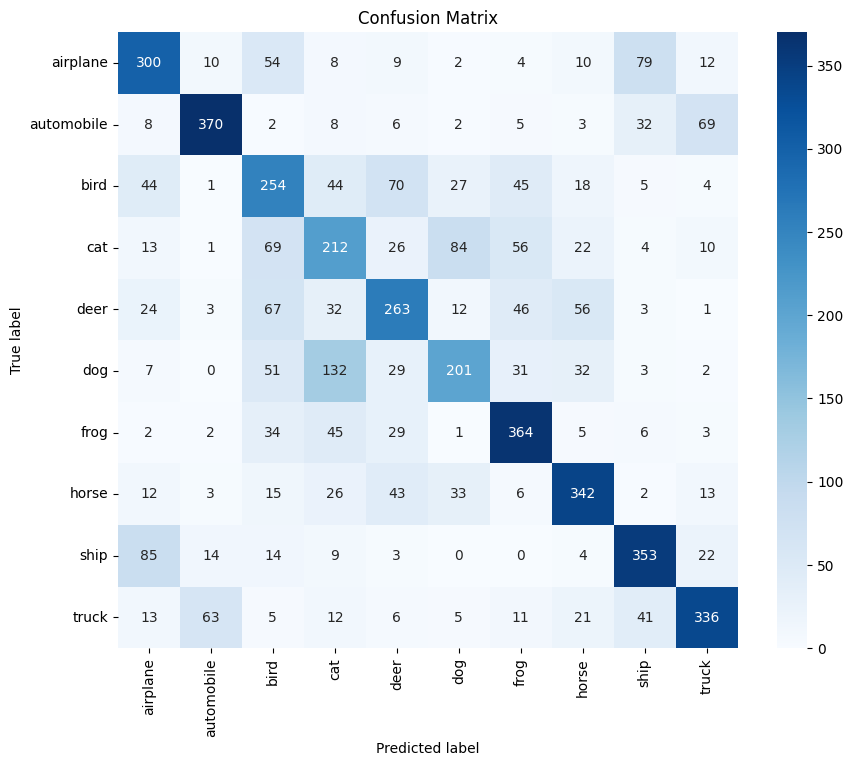

            Metric     Score
0         Accuracy  0.599000
1  Macro Precision  0.601292
2     Macro Recall  0.598832
3   Macro F1-score  0.598237
4  Micro Precision  0.599000
5     Micro Recall  0.599000
6   Micro F1-score  0.599000
7         Log Loss  1.143932


/Applications/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


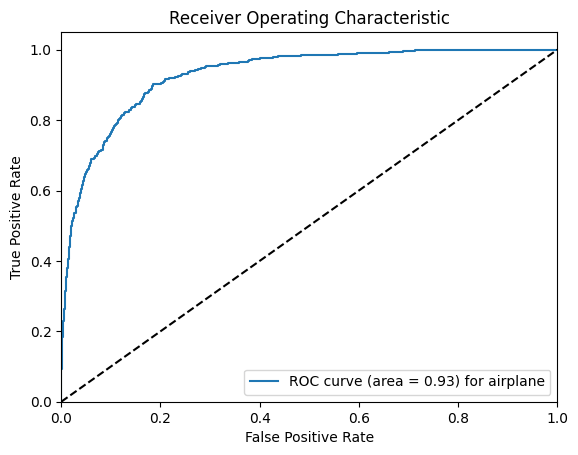

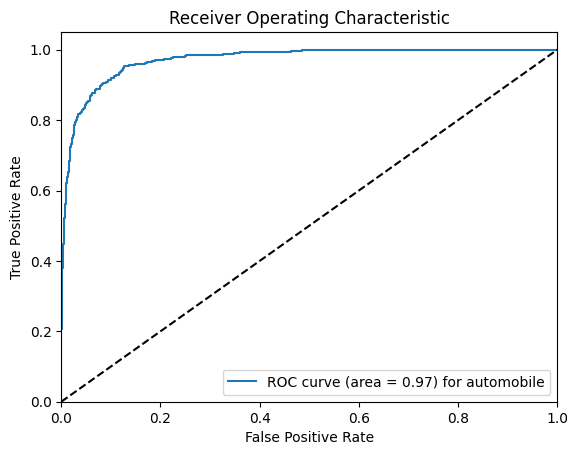

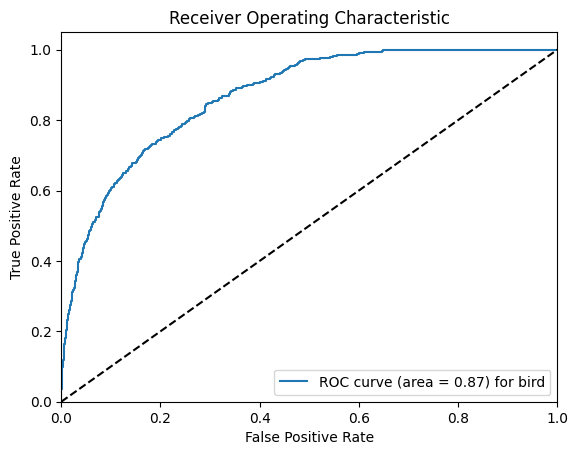

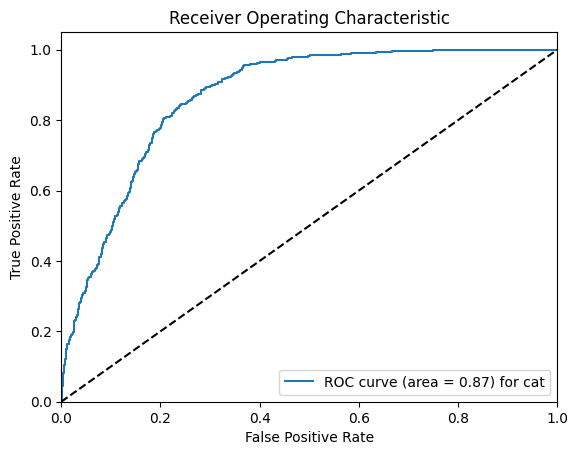

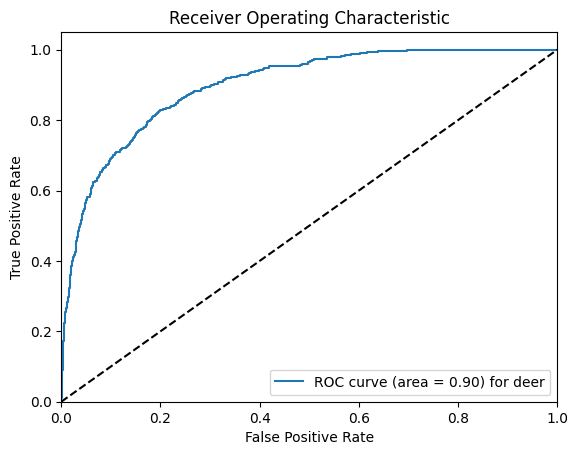

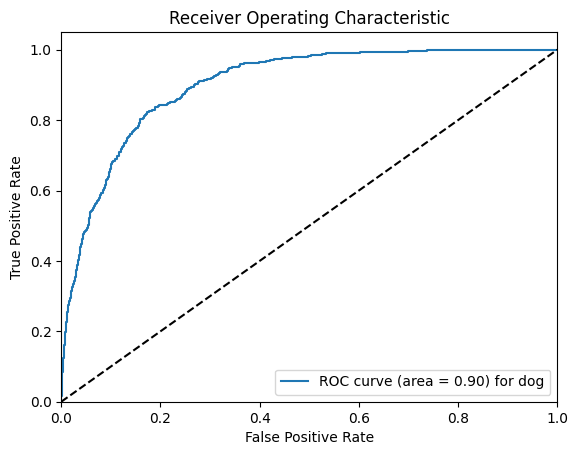

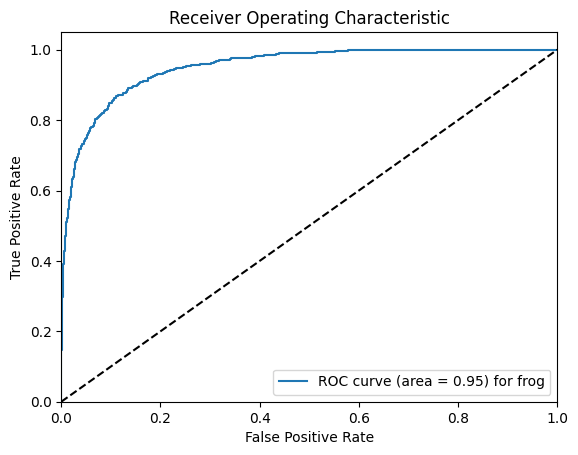

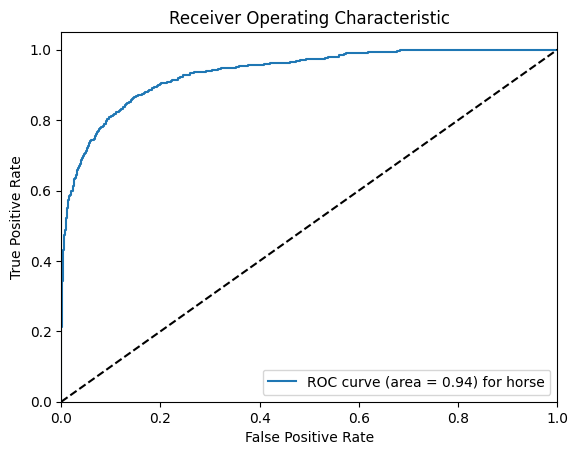

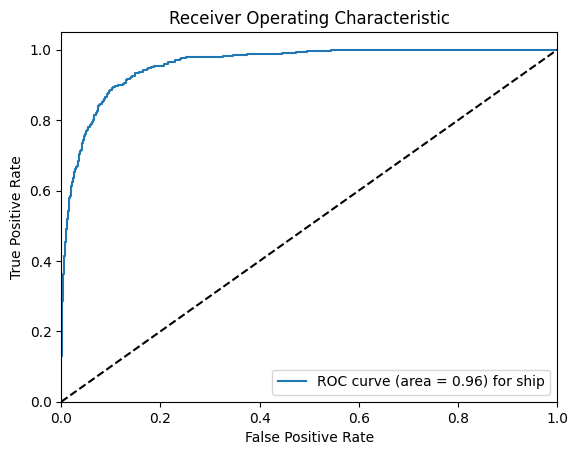

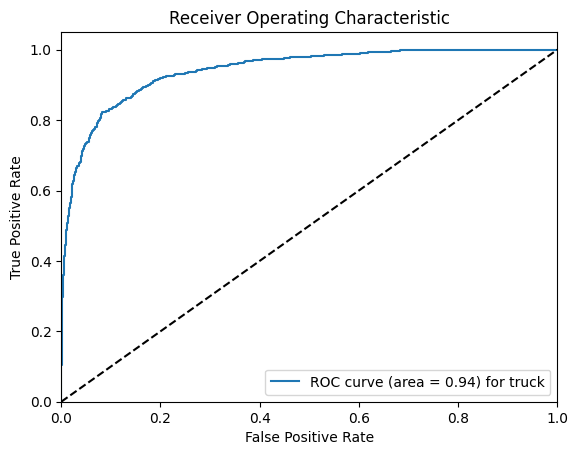

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,
                             classification_report, log_loss, roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import label_binarize
import numpy as np

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predict the classes and probabilities of the validation set
y_val_pred = model.predict(X_val).argmax(axis=1)
y_val_prob = model.predict(X_val)  # assuming predict gives probabilities

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-score with 'macro' average
precision_macro = precision_score(y_val, y_val_pred, average='macro')
recall_macro = recall_score(y_val, y_val_pred, average='macro')
f1_macro = f1_score(y_val, y_val_pred, average='macro')

# Precision, Recall, F1-score with 'micro' average
precision_micro = precision_score(y_val, y_val_pred, average='micro')
recall_micro = recall_score(y_val, y_val_pred, average='micro')
f1_micro = f1_score(y_val, y_val_pred, average='micro')

# Log Loss
logloss = log_loss(y_val, y_val_prob)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score',
               'Micro Precision', 'Micro Recall', 'Micro F1-score', 'Log Loss'],
    'Score': [accuracy, precision_macro, recall_macro, f1_macro,
              precision_micro, recall_micro, f1_micro, logloss]
})

print(results)

# ROC and AUC
n_classes = 10

# Binarize the output
y_val_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_names[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
